# Primeiro, confirme se você está usando uma versão moderna da biblioteca executando o seguinte script:

In [1]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

1.1.2


# Floresta aleatória para classificação

Nesta seção, veremos o uso de Random Forest para um problema de classificação.

Primeiro, podemos usar a função make_classification() para criar um problema de classificação binária sintética com 1.000 exemplos e 20 recursos de entrada.

O exemplo completo está listado abaixo.

In [2]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


Em seguida, podemos avaliar um algoritmo de floresta aleatória neste conjunto de dados.

Avaliaremos o modelo usando validação cruzada repetida de k-folds estratificadas , com três repetições e 10 dobras. Relataremos a média e o desvio padrão da precisão do modelo em todas as repetições e dobras.

In [3]:
# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# define the model
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.903 (0.024)


Também podemos usar o modelo de floresta aleatória como modelo final e fazer previsões para classificação.

Primeiro, o conjunto de floresta aleatória é ajustado em todos os dados disponíveis, então a função predict() pode ser chamada para fazer previsões sobre novos dados.

O exemplo abaixo demonstra isso em nosso conjunto de dados de classificação binária.

In [4]:
# make predictions using random forest for classification
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# define the model
model = RandomForestClassifier()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[-8.52381793,5.24451077,-12.14967704,-2.92949242,0.99314133,0.67326595,-0.38657932,1.27955683,-0.60712621,3.20807316,0.60504151,-1.38706415,8.92444588,-7.43027595,-2.33653219,1.10358169,0.21547782,1.05057966,0.6975331,0.26076035]]
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 0


# Floresta aleatória para regressão

Nesta seção, veremos o uso de florestas aleatórias para um problema de regressão.

Primeiro, podemos usar a função make_regression() para criar um problema de regressão sintética com 1.000 exemplos e 20 recursos de entrada.

O exemplo completo está listado abaixo.

In [5]:
# test regression dataset
from sklearn.datasets import make_regression
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=2)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


Em seguida, podemos avaliar um algoritmo de floresta aleatória neste conjunto de dados.

Como fizemos na última seção, avaliaremos o modelo usando validação cruzada repetida de k-folds, com três repetições e 10 dobras. Relataremos o erro absoluto médio (MAE) do modelo em todas as repetições e dobras. A biblioteca scikit-learn torna o MAE negativo para que seja maximizado em vez de minimizado. Isso significa que MAE negativo maior é melhor e um modelo perfeito tem MAE de 0.

O exemplo completo está listado abaixo.

In [6]:
# evaluate random forest ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=2)
# define the model
model = RandomForestRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -90.675 (7.791)


Também podemos usar o modelo de floresta aleatória como modelo final e fazer previsões para regressão.

Primeiro, o conjunto de floresta aleatória é ajustado em todos os dados disponíveis, então a função predict() pode ser chamada para fazer previsões sobre novos dados.

O exemplo abaixo demonstra isso em nosso conjunto de dados de regressão.

In [7]:
# random forest for making predictions for regression
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=2)
# define the model
model = RandomForestRegressor()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[-0.89483109,-1.0670149,-0.25448694,-0.53850126,0.21082105,1.37435592,0.71203659,0.73093031,-1.25878104,-2.01656886,0.51906798,0.62767387,0.96250155,1.31410617,-1.25527295,-0.85079036,0.24129757,-0.17571721,-1.11454339,0.36268268]]
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

Prediction: -159


# Hiperparâmetros de floresta aleatória

>0.1 0.858 (0.029)
>0.2 0.871 (0.027)
>0.3 0.878 (0.026)
>0.4 0.891 (0.029)
>0.5 0.894 (0.023)
>0.6 0.898 (0.027)
>0.7 0.898 (0.025)
>0.8 0.900 (0.021)
>0.9 0.902 (0.026)
>1.0 0.903 (0.025)


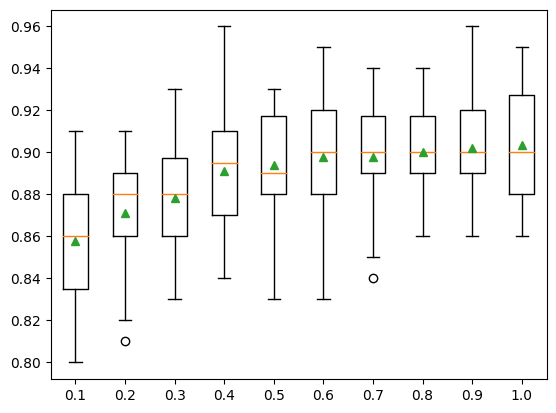

In [8]:
# explore random forest bootstrap sample size on performance
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore ratios from 10% to 100% in 10% increments
	for i in arange(0.1, 1.1, 0.1):
		key = '%.1f' % i
		# set max_samples=None to use 100%
		if i == 1.0:
			i = None
		models[key] = RandomForestClassifier(max_samples=i)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>1 0.892 (0.026)
>2 0.899 (0.026)
>3 0.905 (0.022)
>4 0.906 (0.026)
>5 0.905 (0.026)
>6 0.898 (0.026)
>7 0.896 (0.027)


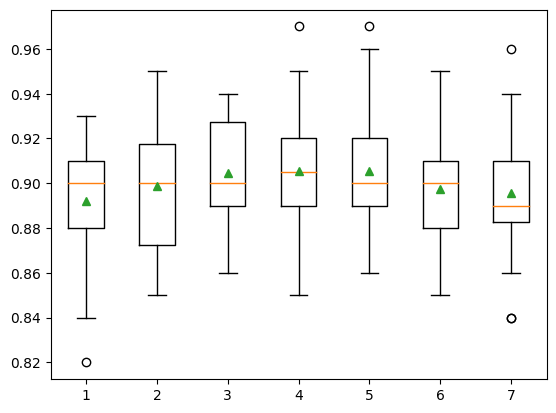

In [9]:
# explore random forest number of features effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore number of features from 1 to 7
	for i in range(1,8):
		models[str(i)] = RandomForestClassifier(max_features=i)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [10]:
# explore random forest number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 1000]
	for n in n_trees:
		models[str(n)] = RandomForestClassifier(n_estimators=n)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>10 0.863 (0.036)
>50 0.896 (0.024)
>100 0.906 (0.022)


In [ ]:
# explore random forest tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# consider tree depths from 1 to 7 and None=full
	depths = [i for i in range(1,8)] + [None]
	for n in depths:
		models[str(n)] = RandomForestClassifier(max_depth=n)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()